# Pytorch Tutorial

Pytorch is a popular deep learning framework and it's easy to get started.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

BATCH_SIZE = 128
NUM_EPOCHS = 30

First, we read the mnist data, preprocess them and encapsulate them into dataloader form.

In [2]:
# preprocessing
normalize = transforms.Normalize(mean=[.5], std=[.5])
transform = transforms.Compose([transforms.ToTensor(), normalize])

# download and load the data
train_dataset = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./mnist/', train=False, transform=transform, download=False)

# encapsulate them into dataloader form
train_loader = data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
test_loader = data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

Then, we define the model, object function and optimizer that we use to classify.

In [3]:
class SimpleNet(nn.Module):
# TODO:define model
    
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28*28,500)
        self.fc2 = nn.Linear(500,100)
        self.fc3 = nn.Linear(100,10)
    def forward(self,x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        output = F.softmax(x, dim = 1)
        return output
    
model = SimpleNet()

# TODO:define loss function and optimiter
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0008, weight_decay=0.0)

Next, we can start to train and evaluate!

100%|██████████| 78/78 [00:01<00:00, 66.45it/s]


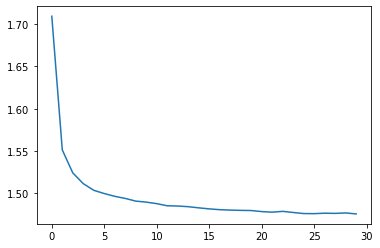

In [4]:
# train and evaluate

trainingloss=[]

for epoch in range(NUM_EPOCHS):
    temploss=[]
    for images, labels in tqdm(train_loader):
        # TODO:forward + backward + optimize
        optimizer.zero_grad()
        outputs = model(images.reshape(-1,28*28))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        temploss.append(loss.item())
    trainingloss.append(sum(temploss)/len(temploss))
        
plt.plot(range(len(trainingloss)),trainingloss)
        
    # evaluate
    # TODO:calculate the accuracy using traning and testing dataset
    
train_correct = 0
train_total = 0
test_correct = 0
test_total = 0
with torch.no_grad():
    for images, labels in tqdm(train_loader):
        outputs = model(images.reshape(-1,28*28))
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    for images, labels in tqdm(test_loader):
        outputs = model(images.reshape(-1,28*28))
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
train_accuracy = train_correct / train_total
test_accuracy = test_correct / test_total


#### Q5:
Please print the training and testing accuracy.

In [5]:
print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 98.69%
Testing accuracy: 97.65%
